In [1]:
using DataFrames
using Gadfly
using Colors

In [32]:
df = readtable("data/bigiron_growth_snr_49b2f59_clean.csv")
head(df)

,technique,score,num_genes,coverage,representation,moi,seq_depth,bottleneck_representation,num_bottlenecks,noise,run_idx,crisprtype
1,snr,2.0047964659806596,500.0,5.0,10.0,0.25,10.0,10.0,1.0,0.01,1.0,CRISPRi
2,snr,2.5960858933745596,500.0,5.0,10.0,0.25,10.0,10.0,1.0,0.01,2.0,CRISPRi
3,snr,1.673750994061914,500.0,5.0,10.0,0.25,10.0,10.0,1.0,0.01,3.0,CRISPRi
4,snr,1.7903205387627041,500.0,5.0,10.0,0.25,10.0,10.0,1.0,0.01,4.0,CRISPRi
5,snr,1.8536620530435448,500.0,5.0,10.0,0.25,10.0,10.0,1.0,0.01,5.0,CRISPRi
6,snr,1.2260337830871457,500.0,5.0,10.0,0.25,10.0,10.0,1.0,0.01,6.0,CRISPRi


In [33]:
df[:rep_lvl] = :none
for (rep_amt, noise_lvl) in zip([(10, 10, 10), (100, 100, 100), (1000, 1000, 1000)], [:x10, :x100, :x1000])
    selection = [
        (:representation, rep_amt[1]),
        (:bottleneck_representation, rep_amt[2]), 
        (:seq_depth, rep_amt[3])
    ]
    df[vec(all(hcat([(df[item[1]] .== item[2]) for item in selection]...), 2)), :rep_lvl] = noise_lvl
end
delete!(df, [:representation, :seq_depth, :bottleneck_representation])
head(df)

,technique,score,num_genes,coverage,moi,num_bottlenecks,noise,run_idx,crisprtype,rep_lvl
1,snr,2.0047964659806596,500.0,5.0,0.25,1.0,0.01,1.0,CRISPRi,x10
2,snr,2.5960858933745596,500.0,5.0,0.25,1.0,0.01,2.0,CRISPRi,x10
3,snr,1.673750994061914,500.0,5.0,0.25,1.0,0.01,3.0,CRISPRi,x10
4,snr,1.7903205387627041,500.0,5.0,0.25,1.0,0.01,4.0,CRISPRi,x10
5,snr,1.8536620530435448,500.0,5.0,0.25,1.0,0.01,5.0,CRISPRi,x10
6,snr,1.2260337830871457,500.0,5.0,0.25,1.0,0.01,6.0,CRISPRi,x10


In [34]:
grouped_info = by(df, [:num_bottlenecks, :crisprtype, :rep_lvl, :technique]) do grouped_df
    grouped_df = grouped_df[1:25, :]
    n = size(grouped_df, 1)
    mean_score = mean(grouped_df[:score])
    std_score = std(grouped_df[:score])
    conf_int = 2.58 * std_score./sqrt(n)
    DataFrame(
        std_score = std_score,
        mean_score = mean_score,
        score_max = mean_score + conf_int,
        score_min = mean_score - conf_int,
        n = n
    )
end
head(grouped_info)

,num_bottlenecks,crisprtype,rep_lvl,technique,std_score,mean_score,score_max,score_min,n
1,1.0,CRISPRKO,x10,noise,0.06515262891235554,0.7008299270857031,0.7344486836044786,0.6672111705669277,25
2,1.0,CRISPRKO,x10,signal,0.23373782689616676,0.8692242210119194,0.9898329396903415,0.7486155023334974,25
3,1.0,CRISPRKO,x10,snr,0.40498352106942564,1.2583363739684486,1.4673078708402723,1.0493648770966248,25
4,1.0,CRISPRKO,x100,noise,0.025883157061396714,0.31201608296480304,0.32537179200848376,0.2986603739211223,25
5,1.0,CRISPRKO,x100,signal,0.15841055492558598,0.5768083010799948,0.6585481474215972,0.49506845473839245,25
6,1.0,CRISPRKO,x100,snr,0.5054823278678255,1.8582379059928502,2.119066787172648,1.5974090248130524,25


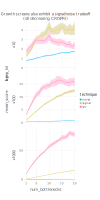

In [47]:
lmhlt(x, y) = x == :x10 && y != :x10 || x == :x100 && y == :x1000
sort!(grouped_info, lt=lmhlt)

data = grouped_info[grouped_info[:crisprtype] .== "CRISPRi", :]

p = plot(data, 
x=:num_bottlenecks,
y=:mean_score,
ymax=:score_max,
ymin=:score_min,
color=:technique,
ygroup=:rep_lvl,
Geom.subplot_grid(
Geom.line,
Geom.ribbon,
# Scale.y_log10,
Coord.cartesian(ymin=0, xmin=1),
free_y_axis=true,
Guide.xticks(ticks=[1,5,10,15,20])
),
Guide.title("Growth screens also exhibit a signal/noise tradeoff\n(all decreasing, CRISPRi)"),
)
draw(SVG("plots/growth_snr_tradeoff_crispri.svg", 15cm, 20cm), p)
draw(PNG("plots/growth_snr_tradeoff_crispri.png", 15cm, 20cm, dpi=300), p)
draw(SVG(10cm, 20cm), p)

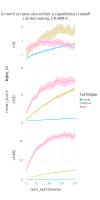

In [48]:
lmhlt(x, y) = x == :x10 && y != :x10 || x == :x100 && y == :x1000
sort!(grouped_info, lt=lmhlt)

data = grouped_info[grouped_info[:crisprtype] .== "CRISPRKO", :]

p = plot(data, 
x=:num_bottlenecks,
y=:mean_score,
ymax=:score_max,
ymin=:score_min,
color=:technique,
ygroup=:rep_lvl,
Geom.subplot_grid(
Geom.line,
Geom.ribbon,
# Scale.y_log10,
Coord.cartesian(ymin=0, xmin=1),
free_y_axis=true,
Guide.xticks(ticks=[1,5,10,15,20])
),
Guide.title("Growth screens also exhibit a signal/noise tradeoff\n(all decreasing, CRISPRn)"),
)
draw(SVG("plots/growth_snr_tradeoff_crisprn.svg", 15cm, 20cm), p)
draw(PNG("plots/growth_snr_tradeoff_crisprn.png", 15cm, 20cm, dpi=300), p)
draw(SVG(10cm, 20cm), p)